# Data Analytics Project - Analysis of fatal accidents on Mount Everest 1990 - 2019

Authors: Rafał Skrzypek, Jakub Majcher


Date: 10.07.2023




# 1.Problem formulation

Statistics from Himalayan expeditions are available for public review. The following data set has information on particular expeditions, members, deaths for each peak in Himalayan Mountain Chain. Those data has been collected since 1920. Every expeditions contains information about status, mountaineers, heights, oxygen use or cause of death.

The main goal of this project is to describe the death rate and investigate the correlation between fatal accident and number of members taking part in expeditions. 

The created models may help to forecast possible accidents in the future and help to prevenet them. Additionally this model can be used to improve safety during expeditions by contribution to educating an raising awereness about conducting safe expeditions in Himalayas.



Database is available on https://www.himalayandatabase.com/index.html

### DAG

Directed acyclic graph created on the basis of preprocessed dataset.
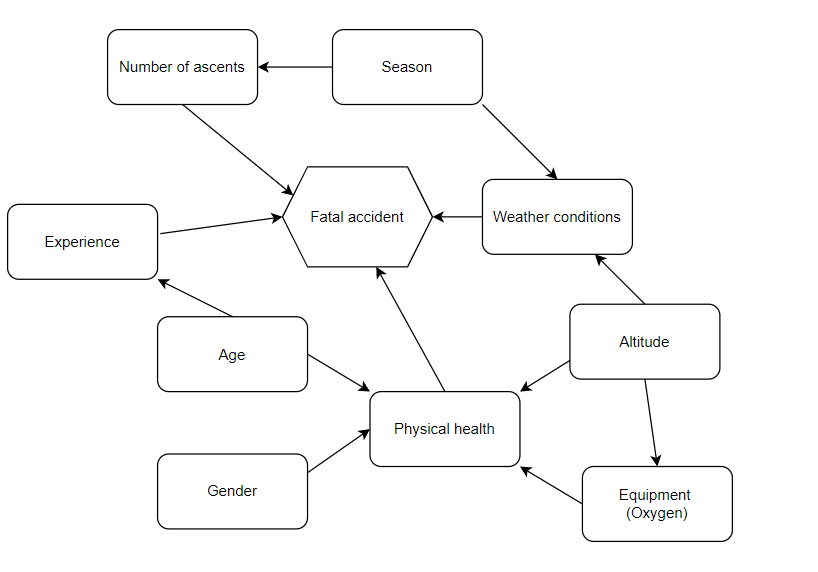

### Possible confoundings

Forks
- Physical health and weather conditions have common cause of altitude
- Physical health and Experience have common cause of Age
- Number of ascents and weather conditions have comon cause of Season

Colliders
- Physical health is influenced by gender, age, equipment, altitude
- Weather conditions are influenced by altitude ad season
- Death accident is influenced by experience, number of ascents, weather conditions and physical health

Pipes
- Gender is transmitted through physical health to fatal accident

# 2.Data preprocessing

The Himalayan database contains a lot of information about expeditions, climbers, staff members, summits, weather conditions, oxygen use, cause of deaths in Himalayan Mountain Chain. To prepare data for modelling only useful data were chosen. We decided to analyse fatal accidents on Mount Everest between years 1990-2019 because during there was a lot of ascents and informations. We rejected year 2020 and next because of the pandemic. During this period it was hard to arrange expeditions. 

From the database we have chosen useful information: 
- Year
- Number of climbers
- Number of staff members
- Death cases of climbers
- Death cases of staff members

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az
import matplotlib as mpl
from scipy.stats import norm
from scipy.optimize import newton

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi'] = 200

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import scipy.stats as stats
import arviz as az
import matplotlib as mpl

In [41]:
#read the data from the xslx file
df = pd.read_excel('EVEREST.xlsx')
df['DEATHS.RATE'] = df['DEATHS']/df['MEMBERS']
df['CLIMBERS_DEATHS.RATE'] = df['CLIMBERS DEATHS']/df['CLIMBERS']
df['STAFF_DEATHS.RATE'] = df['STAFF DEATHS']/df['STAFF']
deaths = df['DEATHS']
deaths_climbers = df['CLIMBERS DEATHS']
death_staff = df['STAFF DEATHS']
deaths_years = df['YEAR']
df.head()

,YEAR,CLIMBERS,STAFF,MEMBERS,CLIMBERS DEATHS,STAFF DEATHS,DEATHS,DEATHS.RATE,CLIMBERS_DEATHS.RATE,STAFF_DEATHS.RATE
0,1990,216,178,394,2,2,4,0.010152,0.009259,0.011236
1,1991,315,170,485,2,0,2,0.004124,0.006349,0.000000
2,1992,375,229,604,3,5,8,0.013245,0.008000,0.021834
3,1993,281,233,514,6,1,7,0.013619,0.021352,0.004292
4,1994,223,159,382,3,2,5,0.013089,0.013453,0.012579


In [42]:
#print column names
df.columns

Index(['YEAR', 'CLIMBERS', 'STAFF', 'MEMBERS', 'CLIMBERS DEATHS',
       'STAFF DEATHS', 'DEATHS', 'DEATHS.RATE', 'CLIMBERS_DEATHS.RATE',
       'STAFF_DEATHS.RATE'],
      dtype='object')

In [43]:
df.describe()

,YEAR,CLIMBERS,STAFF,MEMBERS,CLIMBERS DEATHS,STAFF DEATHS,DEATHS,DEATHS.RATE,CLIMBERS_DEATHS.RATE,STAFF_DEATHS.RATE
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,356.233333,335.866667,692.100000,4.233333,2.20000,6.433333,0.011169,0.012294,0.008517
std,8.803408,125.996356,163.432309,278.367823,2.621967,3.37741,3.784572,0.010491,0.007865,0.016181
min,1990.000000,96.000000,131.000000,284.000000,0.000000,0.00000,1.000000,0.001433,0.000000,0.000000
25%,1997.250000,242.750000,192.500000,473.750000,3.000000,0.00000,4.000000,0.005121,0.007084,0.000000
50%,2004.500000,360.500000,291.500000,608.000000,4.000000,1.00000,5.000000,0.009163,0.011268,0.003566
75%,2011.750000,447.250000,470.250000,898.500000,6.000000,3.00000,8.000000,0.012637,0.016631,0.010978
max,2019.000000,560.000000,682.000000,1242.000000,12.000000,16.00000,16.000000,0.056338,0.040268,0.085106


Text(0.5, 1.0, 'Post-processing data')

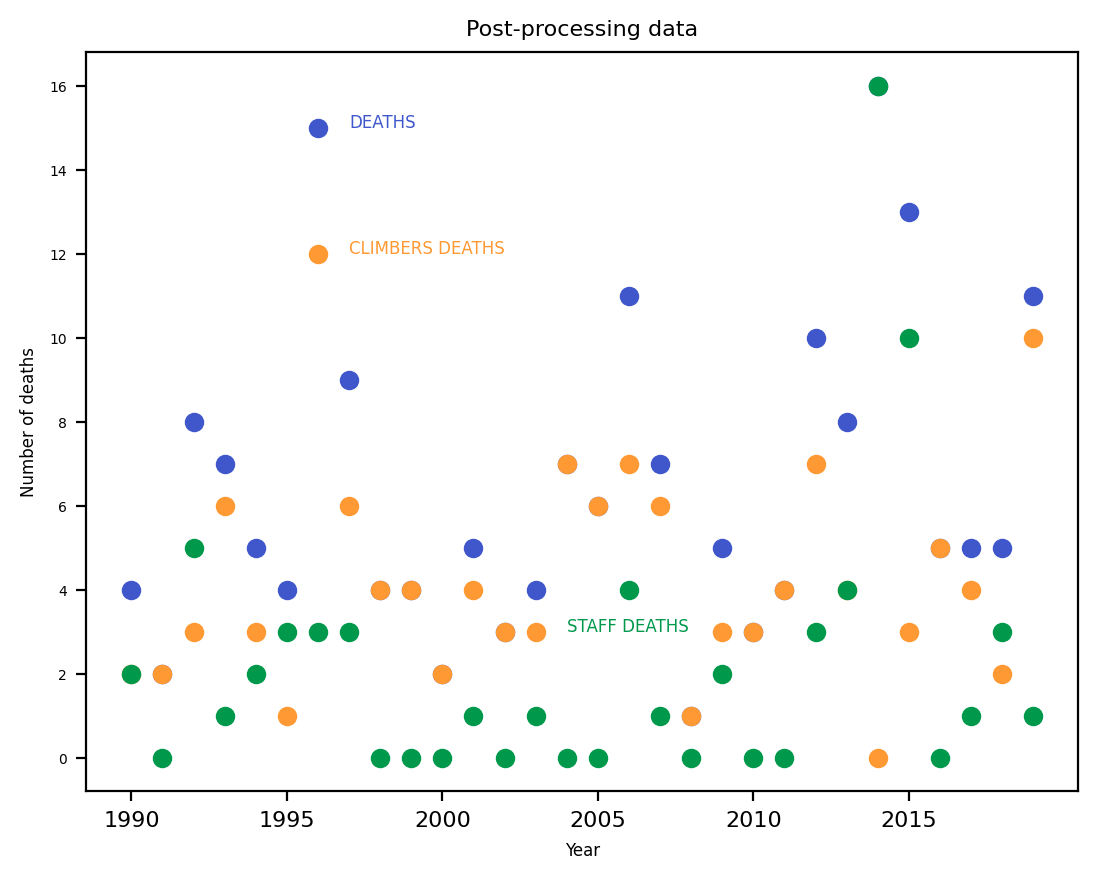

In [44]:
fig,ax = plt.subplots()
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=5)
plt.xticks(range(1990, 2020, 5))
plt.rcParams.update()
ax.scatter(data=df, x = 'YEAR', y = 'DEATHS', color = '#3F57CB')
ax.scatter(data=df, x = 'YEAR', y = 'CLIMBERS DEATHS', color = '#FF9933')
ax.scatter(data=df, x = 'YEAR', y = 'STAFF DEATHS', color = '#00994C')
ax.text(1997, 15, 'DEATHS', fontsize = 6, color = '#3F57CB')
ax.text(1997, 12, 'CLIMBERS DEATHS', fontsize = 6, color = '#FF9933')
ax.text(2004, 3, 'STAFF DEATHS', fontsize = 6, color = '#00994C')
plt.xlabel('Year', fontsize = 6)
plt.ylabel('Number of deaths', fontsize = 6)
plt.title("Post-processing data", fontsize = 8)

Each year differs in terms of fatal accidents. In some years, only climbers were affected by accidents, while in others, only staff members were involved. The main cause of such incidents is the changing weather conditions on Mount Everest, which lead to blizzards and avalanches. In our project we decided to analyse only climbers deaths.

In [45]:
df['DEATHS'].describe()

count    30.000000
mean      6.433333
std       3.784572
min       1.000000
25%       4.000000
50%       5.000000
75%       8.000000
max      16.000000
Name: DEATHS, dtype: float64

In [46]:
df['CLIMBERS DEATHS'].describe()

count    30.000000
mean      4.233333
std       2.621967
min       0.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      12.000000
Name: CLIMBERS DEATHS, dtype: float64

# 3. Models

Two Different Models Specified:
- The Poisson Model: The Poisson model assumes that the number of deaths follows a Poisson distribution, which is a discrete probability distribution used for events that occur at a constant average rate over a fixed interval of time or space.
- Modified Poisson Model: The modified Poisson model incorporates an additional parameter that is dependent on the number of climbers in a given year. This parameter allows for the possibility that the average rate of deaths may vary depending on the number of climbers.

Difference Between Two Models Explained:
- The Poisson Model: In the basic Poisson model, the parameter represents the average rate of deaths over a specific interval. It assumes that the rate remains constant regardless of any external factors such as the number of climbers.
- Modified Poisson Model: The modified Poisson model includes an additional parameter that captures the potential relationship between the number of climbers and the average rate of deaths. This acknowledges the possibility that the risk of death may increase or decrease with the number of climbers present on Mount Everest in a given year.

Justification for the Difference in Models:
- The inclusion of the additional parameter in the modified Poisson model is justified because it accounts for a potential relationship between the number of climbers and the risk of death. It allows for a more nuanced analysis by considering how the average rate of deaths may vary based on the number of climbers present.

Sufficient Description of the Models:
- The Poisson Model:

$$
\begin{align*}
y_i \sim Poisson(\lambda)
\end{align*}
$$

λ is the parameter representing the average of deaths.

- Modified Poisson Model:

$$
\begin{align*}
y_i \sim Poisson(\theta n)
\end{align*}
$$

$\lambda$ can be decomposed to intensity $\theta$ and exposure $n$ which is the number of climbers who went on expeditions in a given year

## 4. Prior first model


The mean of fatal accidents of climbers per year is approximately 4, but there are years when this number is much higher (e.g., 12 in 1996). Therefore, we assume that the probability of having 4 times the number of accidents observed in 1996 is 1%.

To find lambda, which is the average in the Poisson distribution, lambda is the mean value of events, and the square root of lambda is the standard deviation. So, to find lambda for which approximately 99% of the probability density of the distribution will fall within the range up to 48, we need to solve the equation:

$$
\begin{align*}
\lambda + 3* \sqrt{\lambda} ≈ 48
\end{align*}
$$

In [47]:
coefficients = [-48., 3., 1.]
roots = np.polynomial.polynomial.polyroots(coefficients)

positive_roots = roots[roots > 0]
lam_ub = np.round(positive_roots**2)

print(roots)
print(lam_ub)

[-8.58872344  5.58872344]
[31.]


We know that for a normal distribution with a mean of 31 and a standard deviation of the square root of 31, there is a 1 percent chance that the number of deaths in a given year will exceed 48. The next step is to model the prior distribution for lambda. To do this, we will use a half-normal distribution for which 99 percent of the density will be less than the previously calculated threshold value of lambda, which is 31.

To determine the standard deviation for such a distribution using the Newton's method, we need to solve:

In [48]:
desired_percentage = 0.99

def equation(std_dev):
    return norm.cdf(lam_ub, loc=0, scale=std_dev) - desired_percentage

std_dev = newton(equation, 10.0)

print("Standard deviation for", desired_percentage*100, "% values lower than", lam_ub, "is:", std_dev)


Standard deviation for 99.0 % values lower than [31.] is: [13.32560807]


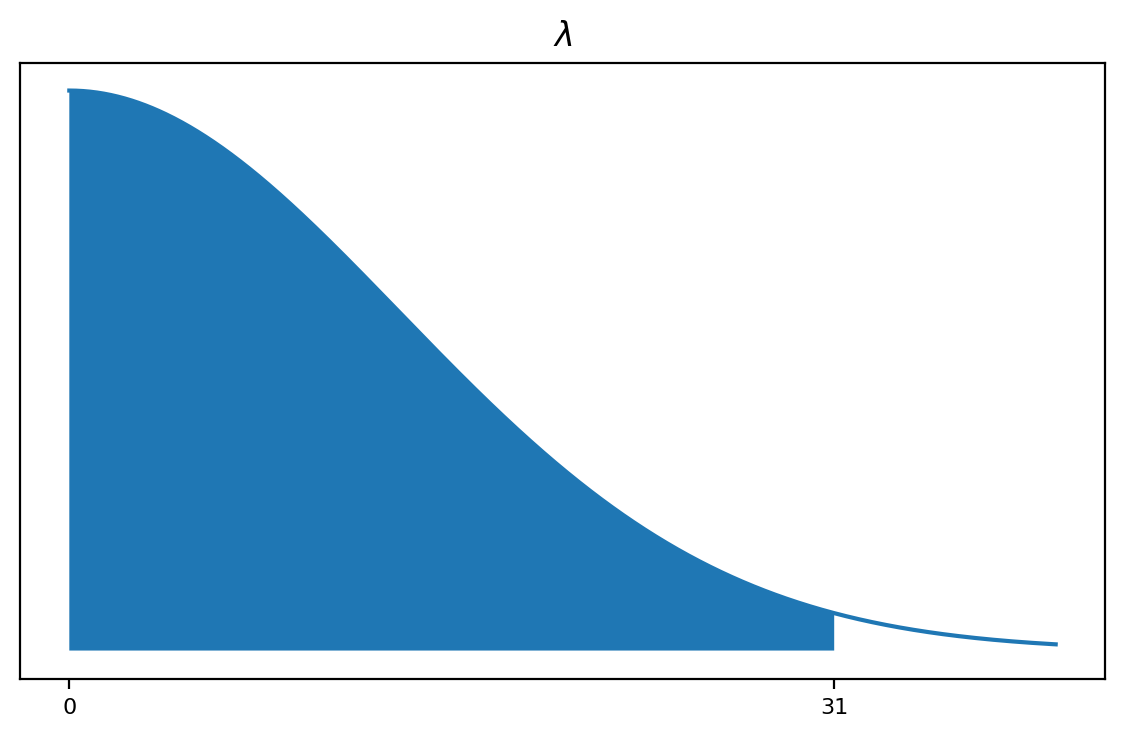

In [49]:
fig, ax2 = plt.subplots(1, 1, figsize=(7,4))
x2 = np.linspace(0, 3*std_dev, 1000)
x4 = np. linspace(0, lam_ub[0], 1000)
ax2.plot(x2, 2*stats.norm.pdf(x2, scale=std_dev))
ax2.fill_between(x4, 2*stats.norm.pdf(x4, scale=std_dev), 0)
ax2.set_yticks([])
ax2.set_xticks([0, lam_ub[0]])
ax2.set_title(r'$\lambda$')
plt.show()

### Prior predictice checks

In this model poisson distribution is used to generate samples based only on prior. We are using absolute values of normal distribution with mean value = 0 and calculated before standard deviation = 13.325. This allows to avoid sampling errors.

In [50]:
#the prior model
with open('model1_prior.stan', 'r') as file:
    print(file.read())

data {
    int M; //Number of years analyzed
}

generated quantities {
   real lambda =fabs(normal_rng(0,13.325));
   int y_sim[M];
   for (k in 1:M){
    y_sim[k] = poisson_rng(lambda);
   }
}


In [51]:
ppc_model1 = CmdStanModel(stan_file = 'model1_prior.stan')

R = 1000 
sim_normal = ppc_model1.sample(data={'M':1},
                             iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 30062023)


19:54:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


19:54:15 - cmdstanpy - INFO - CmdStan done processing.


In [52]:
y_sim = sim_normal.stan_variable('y_sim')
lambda_sim = sim_normal.stan_variable('lambda')

In [53]:
# Sorting deaths for plot display
sorted_vector = np.sort(deaths_climbers)
counter_vector = np.zeros_like(sorted_vector)
unique_values, value_counts = np.unique(sorted_vector, return_counts=True)
for value, count in zip(unique_values, value_counts):
    indices = np.where(sorted_vector == value)
    counter_vector[indices] = np.arange(1, count+1)

C:\Users\rafal\AppData\Local\Temp\ipykernel_28228\2781710697.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.annotate('Halfnormal(0,13.325)', xy=(x_annotate, 2*stats.norm.pdf(x_annotate,0,lam)), xytext=(x_annotate+5, 2*stats.norm.pdf(x_annotate,0,lam)),


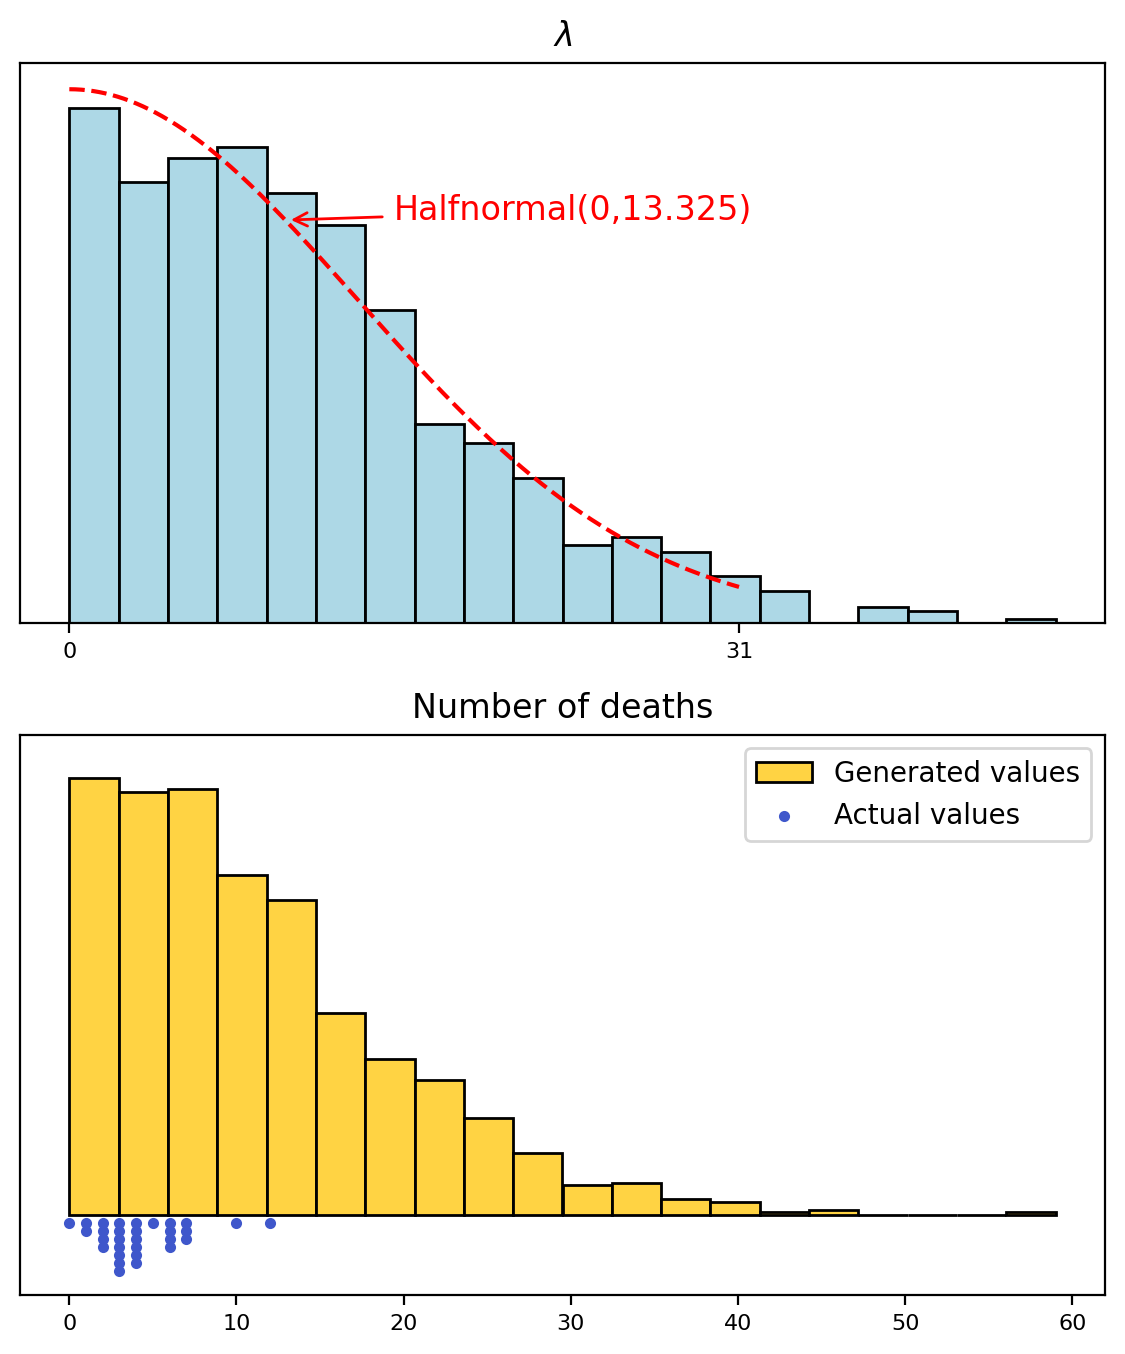

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(7,8))

# Plotting the lambda distribution
ax1 = axes[0]
ax1.hist(lambda_sim, bins=20, color="lightblue", edgecolor="black", density=True)

# Plotting the half normal distribution
x = np.linspace(0, lam_ub[0], 2000)
lam = std_dev
x_annotate = 10
half_normal = np.exp(-x**2 / (2 * lam**2)) / (lam * np.sqrt(2 * np.pi))
ax1.plot(x, 2*stats.norm.pdf(x,0,lam), color='red', linestyle='--')

ax1.set_xticks([0, lam_ub[0]])
ax1.set_yticks([])
ax1.set_title(r'$\lambda$')
ax1.annotate('Halfnormal(0,13.325)', xy=(x_annotate, 2*stats.norm.pdf(x_annotate,0,lam)), xytext=(x_annotate+5, 2*stats.norm.pdf(x_annotate,0,lam)),
            arrowprops=dict(facecolor='red', arrowstyle='->', color='red'),
            fontsize=12, color='red')

# Plotting the y_sim distribution
ax2 = axes[1]
hist, bins, _ = ax2.hist(y_sim.flatten(), bins=20, color=["#FFD343"], edgecolor="black", density=True, label='Generated values')
ax2.scatter(x = sorted_vector, y = -0.001*counter_vector, color = '#3F57CB', marker='.', zorder=2, label='Actual values')
ax2.set_title("Number of deaths")
max_count = max(hist)
ax2.set_ylim(-0.01, max_count + max_count*0.1) 
ax2.set_yticks([])
ax2.legend()
plt.show()

Generated $\lambda$ parameter is consitent with halfnormal prior.

Generated number of deaths is located in the most probable area so prior is consistent with it. The disadvantage of the prior might be the fact that the highest probability of fatal accident expects more samples with low values, but there are only 1 case where was only 1 death within a year and 2 cases where there 2 and 3 deaths. But probability of higher number of fatal accidents decreases, which is correct. Tail is filled up to 48 in accordance with the assumption.

# 5. Posterior first model

To infer the value of lambda the model containing: 
- data block with actual number of fatal accidents within a year, 
- parameter block with the value of $\lambda$ with enforced constraints to get halfnormal distribution of $\lambda$ in the model
- model block with likelihood function where outputs are distributed with poisson distribution with given $\lambda$
- gennerated quantities block for genereting values for predictions


In [55]:
#the posterior model
with open('model1_posterior.stan', 'r') as file:
    print(file.read())

data {
  int M; // Number of years analyzed
  int y[M]; // Number of fatal accidents
}

parameters {
  real<lower=0> lambda;
}

model {
  lambda ~ normal(0, 13.325);
  y ~ poisson(lambda);
}

generated quantities {
  int y_sim[M];
  real log_lik[M];

  for (k in 1:M) {
    y_sim[k] = poisson_rng(lambda);
    log_lik[k] = poisson_lpmf(y[k] | lambda);
  }
}


In [56]:
data = dict(M = len(df),
          y = deaths_climbers)
normal_model2 = CmdStanModel(stan_file = 'model1_posterior.stan')
sim_normal_1 = normal_model2.sample(data=data, seed=8052023)

19:54:18 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                | 00:00 Status
chain 2 |                                                                                                | 00:00 Status

chain 3 |                                                                                                | 00:00 Status


chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed

chain 2 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


chain 3 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed



chain 4 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


19:54:18 - cmdstanpy - INFO - CmdStan done processing.


### There were no sampling issues

In [57]:
y_sim_fit = sim_normal_1.stan_variable('y_sim')
lambda_fit = sim_normal_1.stan_variable('lambda')

In [58]:
mean_lam = np.mean(lambda_fit)
cinf_lam = az.hdi(lambda_fit, hdi_prob=0.89)
hdi_width = cinf_lam[1] - cinf_lam[0]
print('Mean lambda : {:4.2f}'.format(mean_lam))
print("89% confidence interval: [{} {}]".format(cinf_lam[0], cinf_lam[1]))


Mean lambda : 4.28
89% confidence interval: [3.67247 4.87541]


### Analysis of samples:

C:\Users\rafal\AppData\Local\Temp\ipykernel_28228\3504599402.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.annotate('Prior', xy=(35, arrow_y_loc), xytext=(20, arrow_y_loc*50),


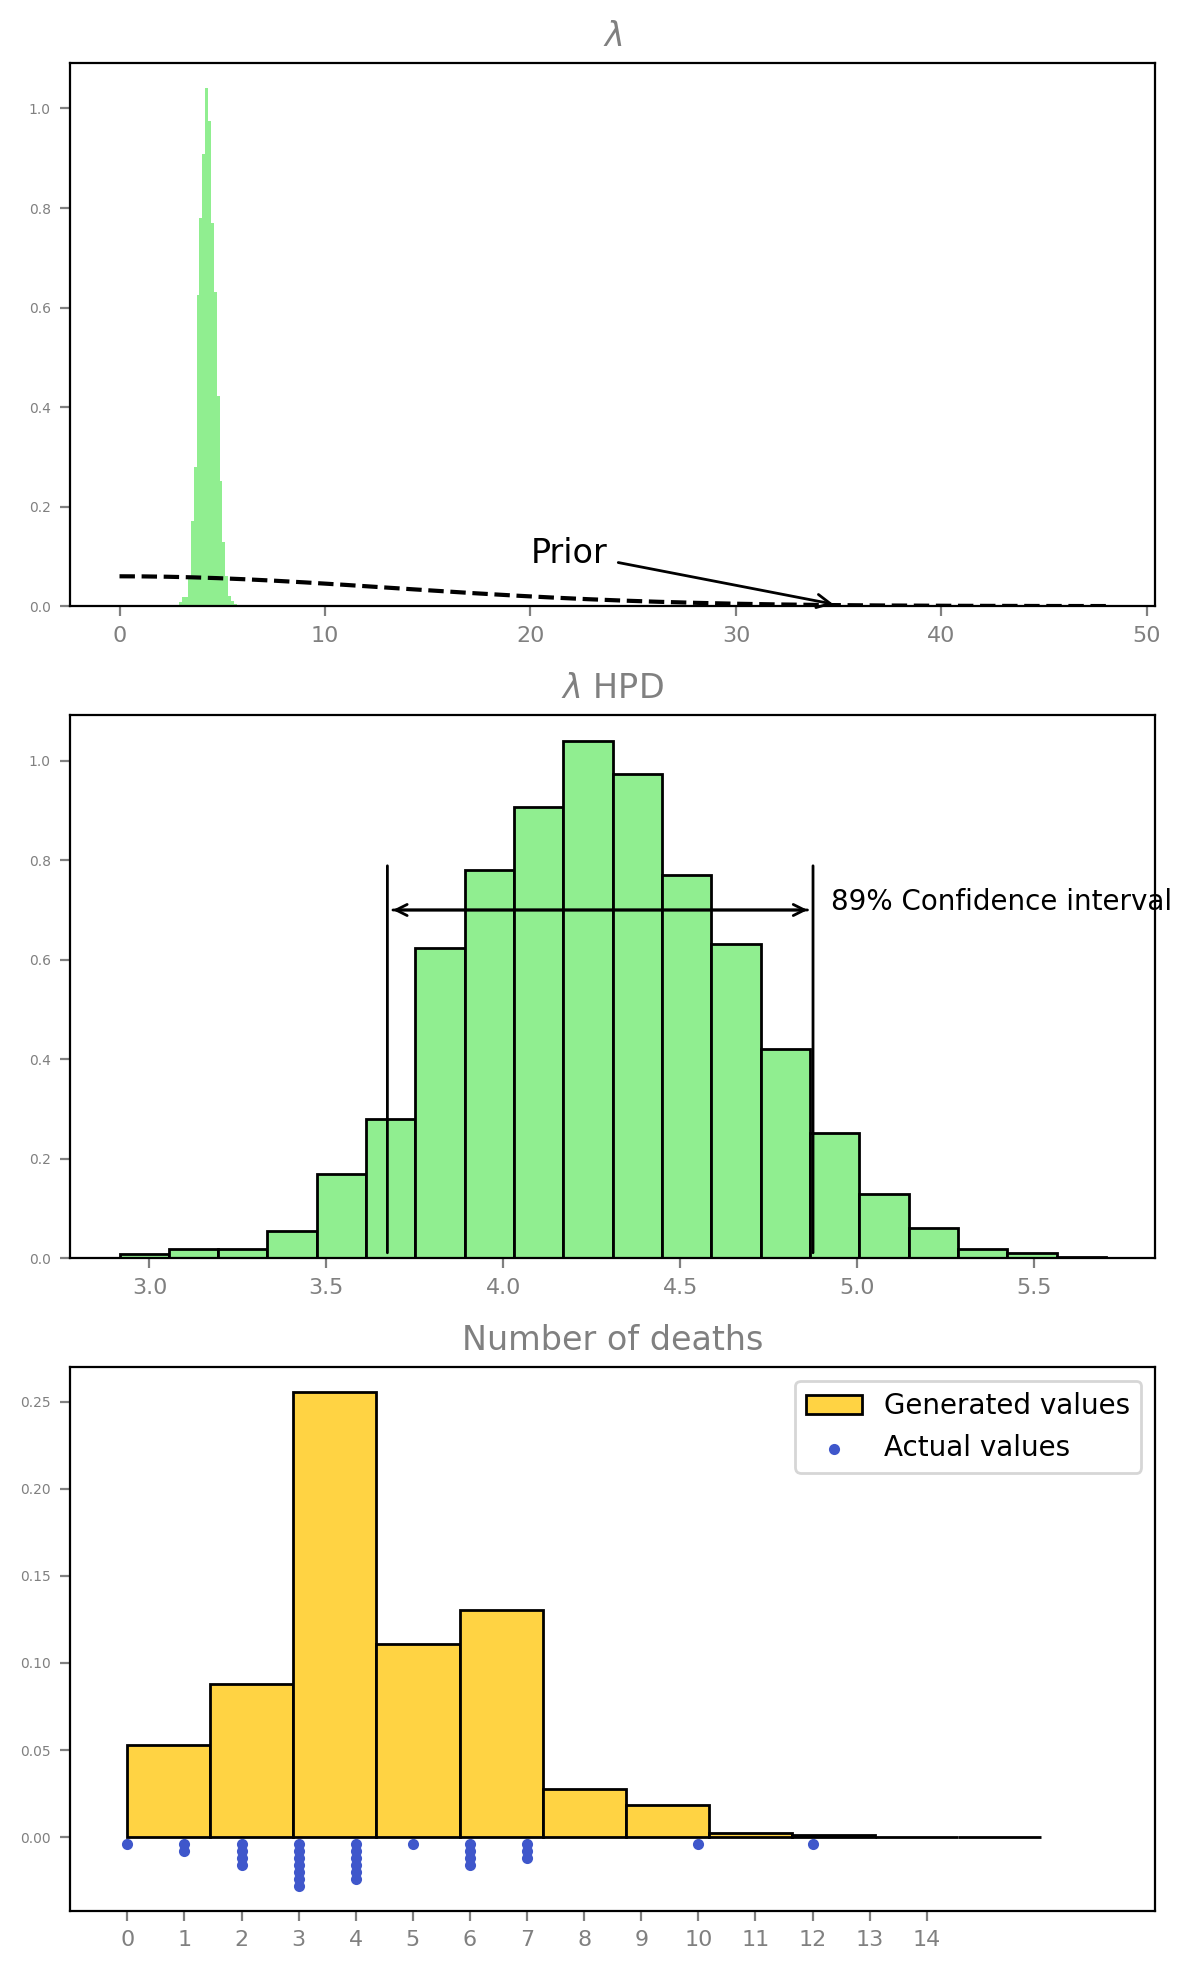

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(7,12))
# First subplot
ax1=axes[0]
ax1.hist(lambda_fit,bins=20, color=["#90EE90"], density=True)
x=np.linspace(0,48,1000)
ax1.plot(x, 2*stats.norm.pdf(x,0,std_dev), color='black', linestyle = '--')
arrow_y_loc = 2*stats.norm.pdf(50,0,20)
ax1.annotate('Prior', xy=(35, arrow_y_loc), xytext=(20, arrow_y_loc*50),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'),
             fontsize=12, color='black')
ax1.set_title(r'$\lambda$', color='grey')
ax1.tick_params(axis='both', colors='grey')

# Second subplot
ax2=axes[1]
ax2.hist(lambda_fit,bins=20, color=["#90EE90"], edgecolor="black", density=True)
ax2.tick_params(axis='both', colors='grey')
ax2.set_title(r'$\lambda$ HPD', color='grey')
arrow_props = dict(arrowstyle='->', color='black')
arrow_props2 = dict(arrowstyle='-', color='black')
ax2.annotate('', xy=(cinf_lam[1], 0.7), xytext=(cinf_lam[0], 0.7),
              arrowprops=arrow_props, color='black')
ax2.annotate('', xy=(cinf_lam[0], 0.7), xytext=(cinf_lam[1], 0.7),
              arrowprops=arrow_props, color='black')
ax2.annotate('', xy=(cinf_lam[1], 0), xytext=(cinf_lam[1], 0.8),
              arrowprops=arrow_props2, color='black')
ax2.annotate('', xy=(cinf_lam[0], 0), xytext=(cinf_lam[0], 0.8),
              arrowprops=arrow_props2, color='black')
ax2.annotate('89% Confidence interval', xy=(cinf_lam[1], 0.7), xytext=(cinf_lam[1]+0.05, 0.7))


# Third subplot
ax3=axes[2]
ax3.hist(y_sim_fit.flatten(), bins=11, color=["#FFD343"], edgecolor="black", density=True, label='Generated values')
# ax3.hist(deaths, bins=8, color='red', edgecolor="black", density=True, label='Actual values', alpha=0.5)
ax3.scatter(x = sorted_vector, y = -0.004*counter_vector, color = '#3F57CB', marker='.', zorder=2, label='Actual values')
ax3.set_title('Number of deaths', color ='grey', fontsize = 12)
ax3.tick_params(axis='both', colors='grey')
ax3.set_xlim(-1, 18)
ax3.legend()
ax3.set_xticks(range(0, 15, 1))
plt.show()

Data is consistent with prior predictive distribution. Most accidents were generated as expected for the number of 3 and 4 accidents.

Lambda distribution is much thinner comparing to the prior. The reason is wide half normal distribution that isnt too informative.



# 6. Prior second model

To compute the bound we will use previos argument but now $\lambda$ will be adjusted
$$
\begin{align*}
\lambda = \theta * \bar{n} 
\end{align*}
$$
so the condition will look like this:
$$
\begin{align*}
\theta * \bar{n} + 3* \sqrt{\theta * \bar{n}} ≈ 48 
\end{align*}
$$

In [60]:
mean_climbers = np.mean(df['CLIMBERS'])
root_of_theta = np.polynomial.polynomial.polyroots([-48/mean_climbers, 3./np.sqrt(mean_climbers),1.])
theta_ub = (root_of_theta[roots > 0]**2)
print('theta upper bound: {:.3f}'.format(theta_ub[0]))

theta upper bound: 0.088


In [61]:
desired_percentage = 0.99

def equation(std_dev):
    return norm.cdf(theta_ub, loc=0, scale=std_dev) - desired_percentage

std_dev = newton(equation, 0.05)

print("Standard deviation for", desired_percentage*100, "% values lower than", theta_ub, "is:", std_dev)

Standard deviation for 99.0 % values lower than [0.08767801] is: [0.03768912]


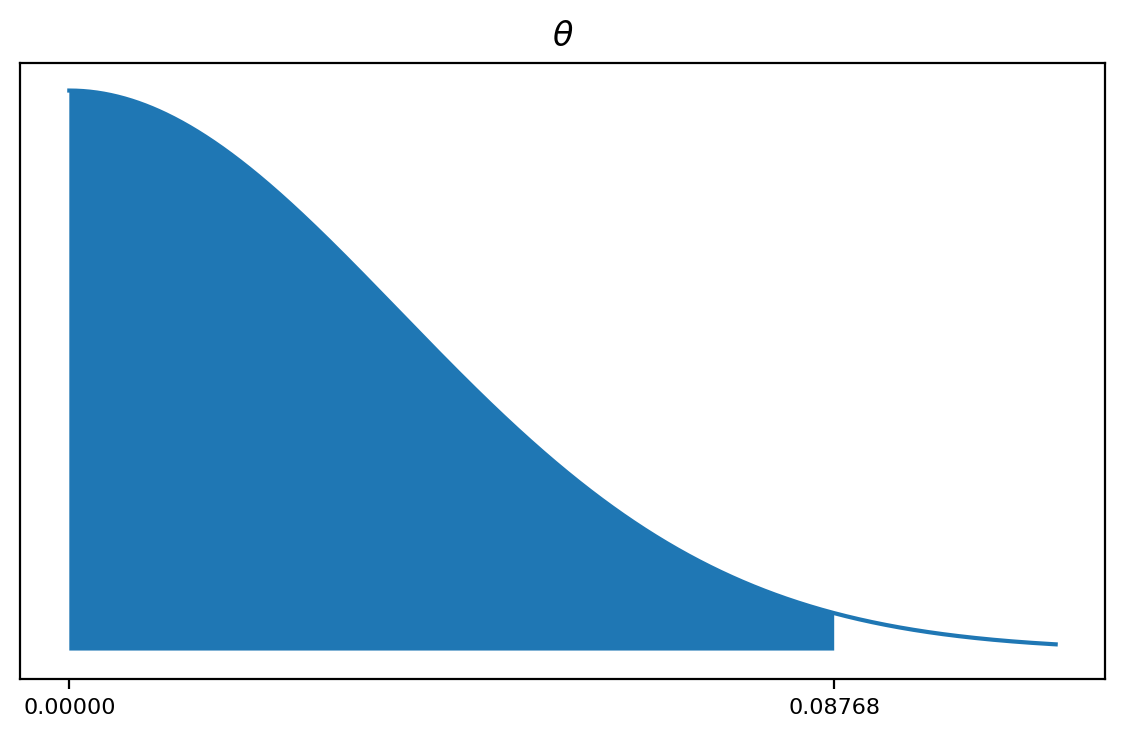

In [62]:
fig, ax2 = plt.subplots(1, 1, figsize=(7,4))
x2 = np.linspace(0, 3*std_dev, 1000)
x4 = np. linspace(0, theta_ub[0], 1000)
ax2.plot(x2, 2*stats.norm.pdf(x2, scale=std_dev))
ax2.fill_between(x4, 2*stats.norm.pdf(x4, scale=std_dev), 0)
ax2.set_yticks([])
ax2.set_xticks([0, theta_ub[0]])
ax2.set_title(r'$\theta$')
plt.show()

### Prior predictice checks

In [63]:
#the prior model
with open('model2_prior.stan', 'r') as file:
    print(file.read()) 

data {
   int M; //number of years analyzed
   vector[M] climbers; // number of climbers going for expedition each year
}

generated quantities {
   real theta=fabs(normal_rng(0,0.0376));
   int y_sim[M];
   for (k in 1:M){
    y_sim[k] = poisson_rng(theta*climbers[k]);
   }
}


In [64]:
climbers_prior = CmdStanModel(stan_file = 'model2_prior.stan')
data_prior=dict(M=len(df), climbers=df['CLIMBERS'])
R = 1000 
df_members_prior = climbers_prior.sample(data=data_prior,
                            iter_sampling = R, 
                             iter_warmup = 0,
                             chains = 1,
                             fixed_param = True,
                             seed = 30062023)


19:54:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed


19:54:25 - cmdstanpy - INFO - CmdStan done processing.


In [65]:
y_prior = df_members_prior.stan_variable('y_sim')
theta_prior = df_members_prior.stan_variable('theta')

C:\Users\rafal\AppData\Local\Temp\ipykernel_28228\126098461.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.annotate('Halfnormal(0,0.0376)', xy=(x_annotate, 2*stats.norm.pdf(x_annotate,0,lam)), xytext=(x_annotate+0.01, 2*stats.norm.pdf(x_annotate,0,lam)),


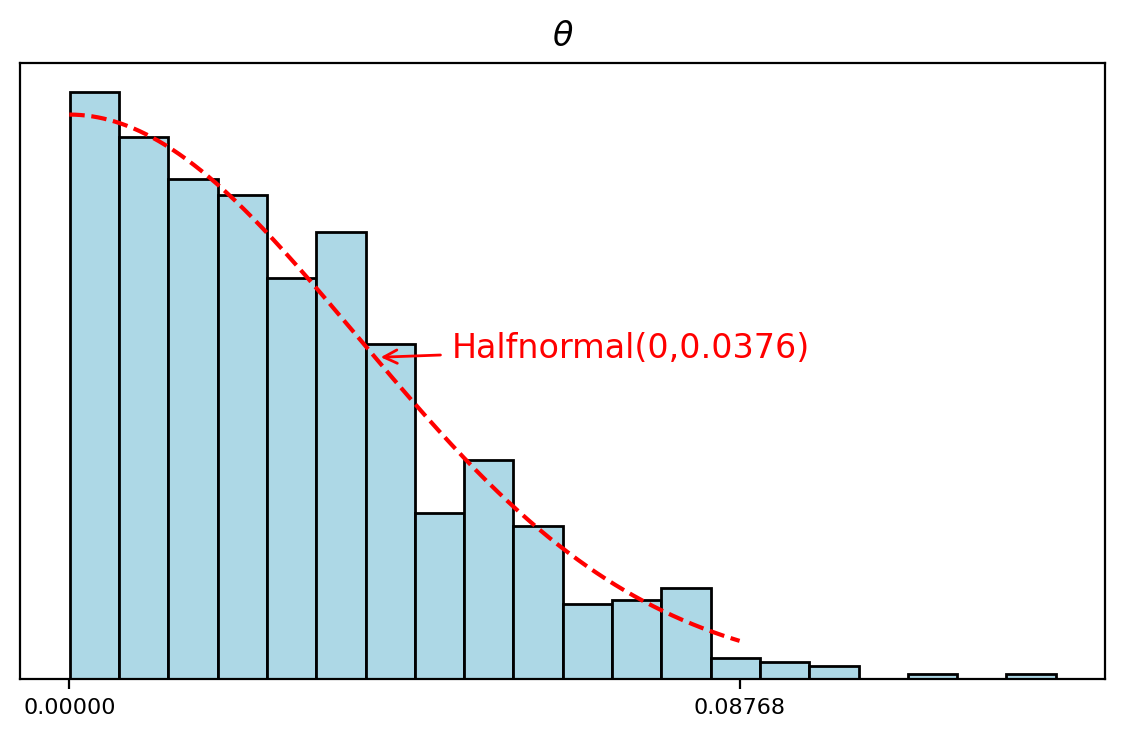

In [66]:
# Plotting the theta distribution
fig, ax1 = plt.subplots(1,1,figsize=(7,4))
ax1.hist(theta_prior, bins=20,color='lightblue', edgecolor='black', density=True)

# Plotting the half normal distribution
x = np.linspace(0, theta_ub[0], 2000)
lam = std_dev
x_annotate = 0.04
half_normal = np.exp(-x**2 / (2 * lam**2)) / (lam * np.sqrt(2 * np.pi))
ax1.plot(x, 2*stats.norm.pdf(x,0,lam), color='red', linestyle='--')

ax1.set_xticks([0, theta_ub[0]])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Halfnormal(0,0.0376)', xy=(x_annotate, 2*stats.norm.pdf(x_annotate,0,lam)), xytext=(x_annotate+0.01, 2*stats.norm.pdf(x_annotate,0,lam)),
            arrowprops=dict(facecolor='red', arrowstyle='->', color='red'),
            fontsize=12, color='red')
plt.show()

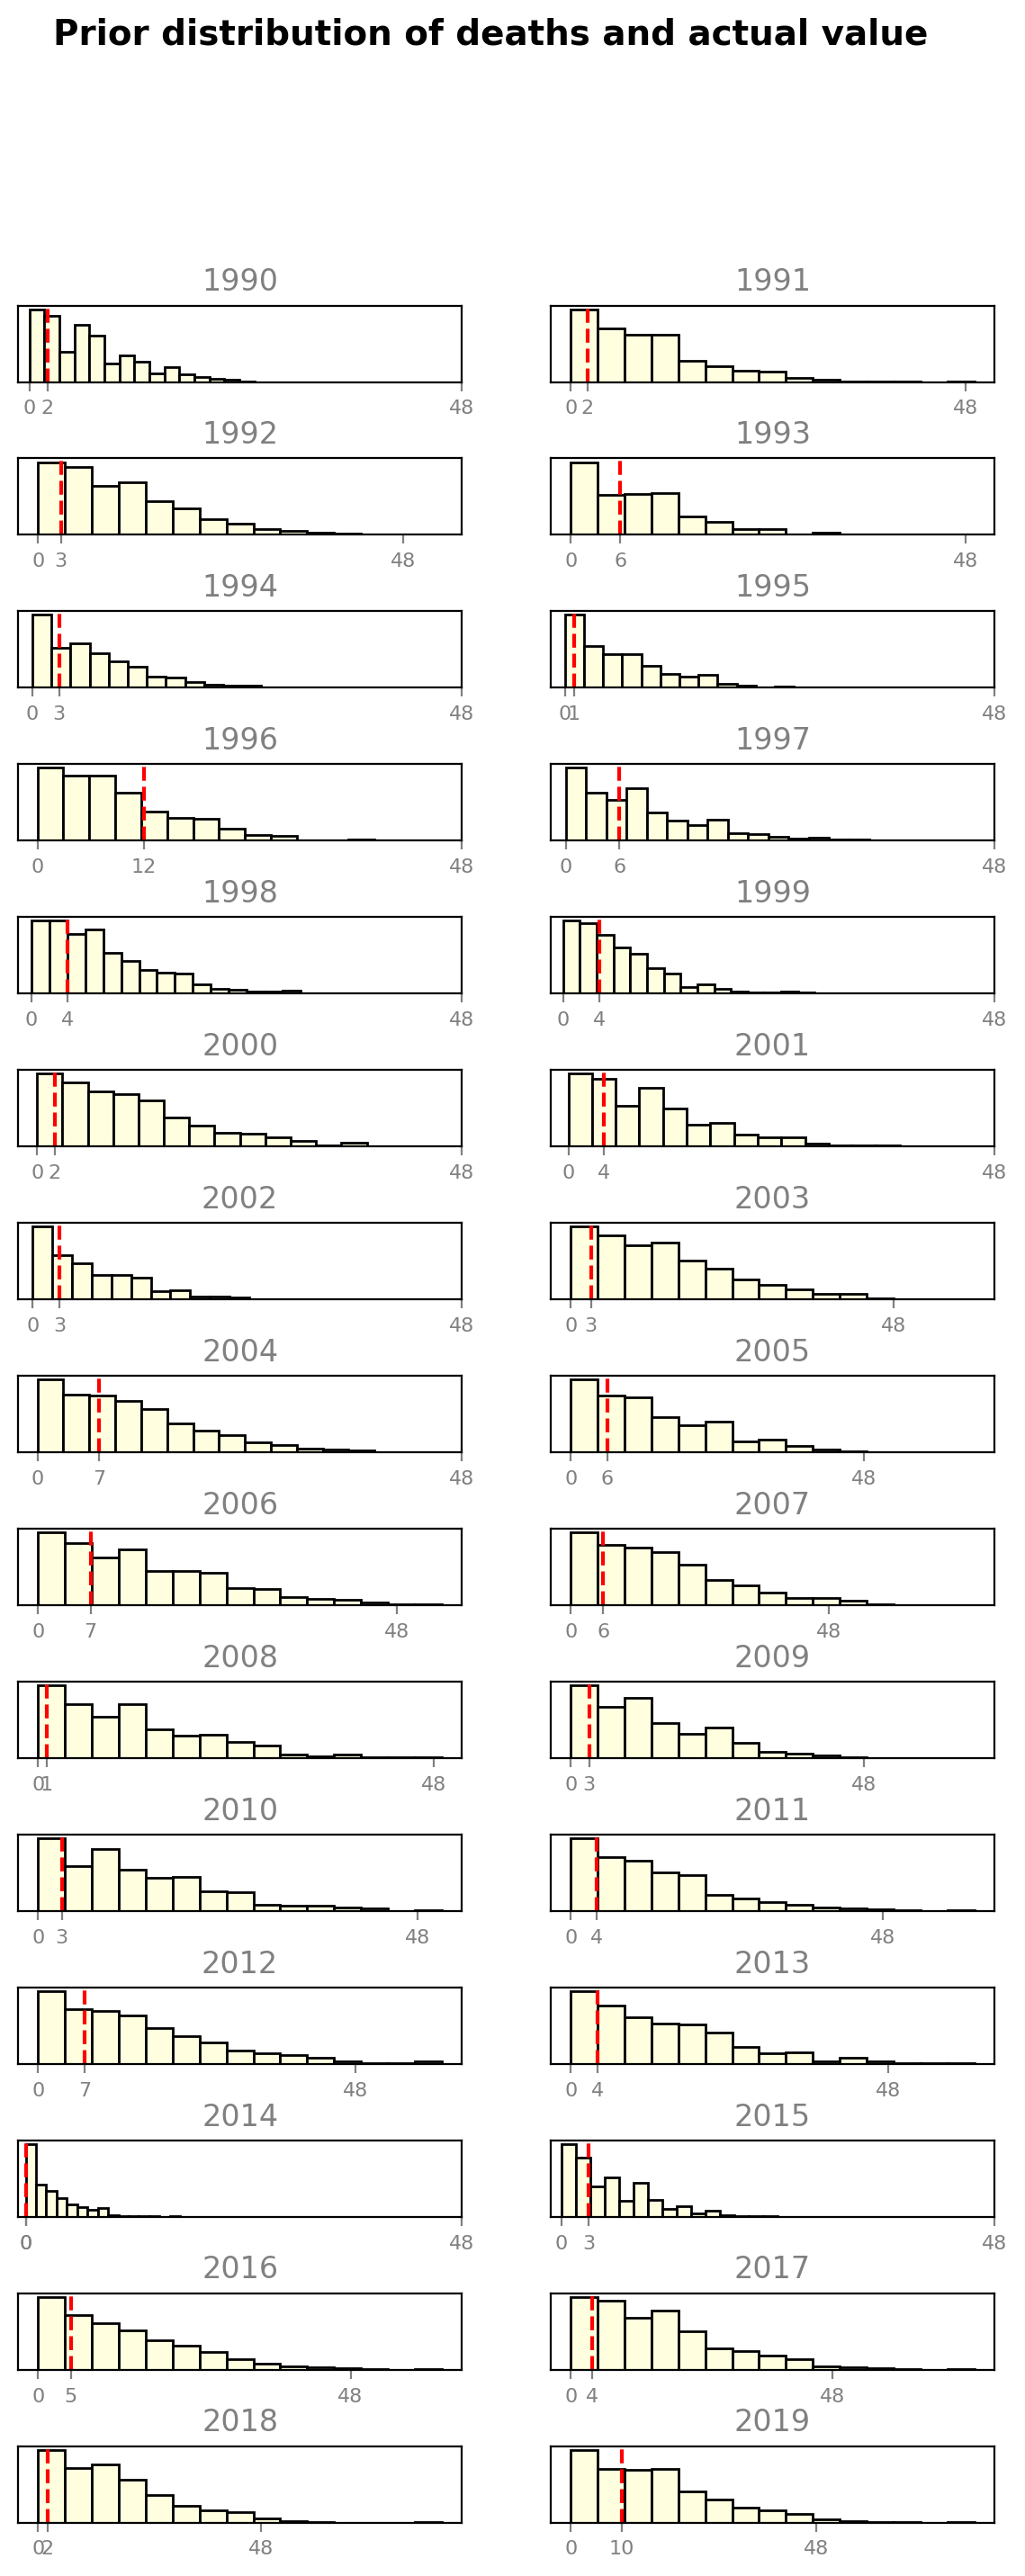

In [67]:
# Tworzenie subplotów
fig, axes = plt.subplots(15, 2, figsize=(7, 16))
axes_flat = axes.flatten()
# Loop through the datasets
for k in range(len(axes_flat)):
    ax = axes_flat[k]
    ax.hist(y_prior[:, k], bins=15, color='lightyellow', edgecolor='black', density='True')
    ax.set_title(deaths_years[k], color = 'grey')
    ax.tick_params(axis='both', colors='grey')
    ax.axvline(x=deaths_climbers[k], color='red', linestyle='--')
    ax.set_xticks([0, deaths_climbers[k], 48])
    ax.set_yticks([])

fig.suptitle('Prior distribution of deaths and actual value', fontsize=14, fontweight='bold')

# Dostosowanie odstępów
plt.subplots_adjust(wspace=0.2, hspace=1)

# Wyświetlenie wykresów
plt.show()

Generated number of deaths is located in the most probable area so prior is consistent with data.

# Posterior predictive checks

In [68]:
with open('model2_posterior.stan', 'r') as file:
    print(file.read())

data {
    int M; //Number of years analyzed
    vector[M] climbers;
    int y[M]; //Number of fatal accidents
}

parameters {
    real<lower=0> theta;
}

model {
    theta ~ normal(0, 0.0376);
    for (k in 1:M) {
        y[k] ~ poisson(climbers[k] * theta);
    }
}

generated quantities {
    int y_sim[M];
    real log_lik[M];
    
    for (k in 1:M) {
        y_sim[k] = poisson_rng(climbers[k] * theta);
        log_lik[k] = poisson_lpmf(y[k] | climbers[k] * theta);
    }
}



In [69]:
members_posterior = CmdStanModel(stan_file = 'model2_posterior.stan')
data_posterior=dict(M = len(df),
                    y = deaths_climbers,
                    climbers = df['CLIMBERS'])
df_members_posterior = members_posterior.sample(data=data_posterior,
                                        seed = 30062023)

19:54:28 - cmdstanpy - INFO - CmdStan start processing
chain 1 |                                                                                                | 00:00 Status
chain 2 |                                                                                                | 00:00 Status

chain 3 |                                                                                                | 00:00 Status


chain 1 |██████████████████████████████████████████████████████████▏  | 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)
chain 2 |███████████████████████████████████████████████████████▍     | 00:00 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 3 |██████████████████████████████████████████████████████████▏  | 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |████████████████████████████████████████████████████████████████████████████████████| 00:00 Sampling completed
chain 2 |████████████████████████████████████████████████████████████████████████████████████| 00:0


19:54:28 - cmdstanpy - INFO - CmdStan done processing.


In [70]:
y_posterior = df_members_posterior.stan_variable('y_sim')
theta_posterior = df_members_posterior.stan_variable('theta')

In [71]:
mean_theta = np.mean(theta_posterior)
cinf_theta = az.hdi(theta_posterior, hdi_prob=0.89)
hdi_width_theta = cinf_theta[1] - cinf_theta[0]
print('Mean lambda : {:4.2f}'.format(mean_theta))
print("89% confidence interval: [{} {}]".format(cinf_theta[0], cinf_theta[1]))

Mean lambda : 0.01
89% confidence interval: [0.0101894 0.0134861]


C:\Users\rafal\AppData\Local\Temp\ipykernel_28228\3147799797.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.annotate('Prior', xy=(x[500], arrow_y_loc), xytext=(x[500]*1.2, arrow_y_loc*10),


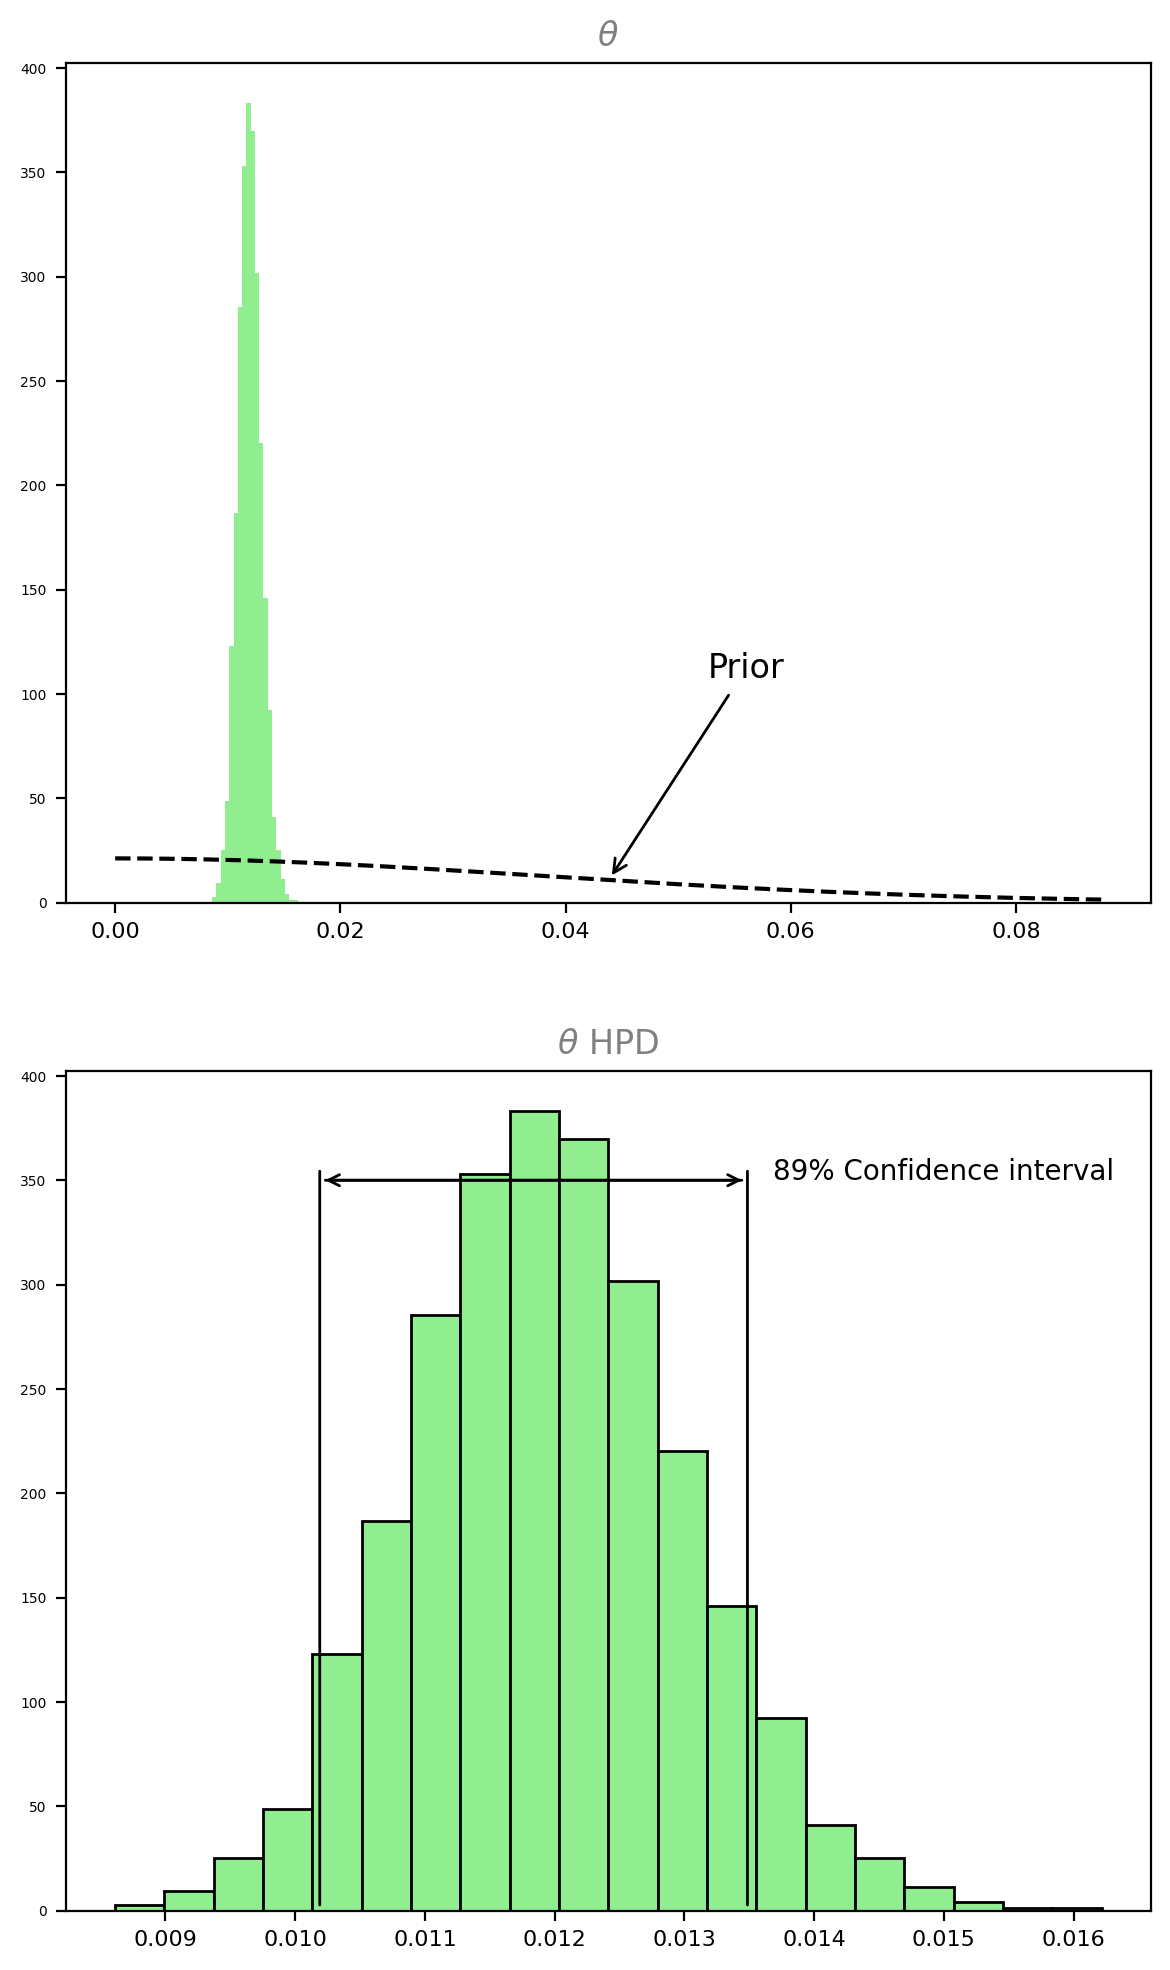

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(7,12))
# First subplot
ax1=axes[0]
ax1.hist(theta_posterior,bins=20, color=["#90EE90"], density=True)
x=np.linspace(0,0.0876,1000)
ax1.plot(x, 2*stats.norm.pdf(x,0,std_dev), color='black', linestyle = '--')
arrow_y_loc = 2*stats.norm.pdf(x[500],0,std_dev)
ax1.annotate('Prior', xy=(x[500], arrow_y_loc), xytext=(x[500]*1.2, arrow_y_loc*10),
             arrowprops=dict(facecolor='black', arrowstyle='->', color='black'),
             fontsize=12, color='black')
ax1.set_title(r'$\theta$', color='grey')


# Second subplot
ax2=axes[1]
ax2.hist(theta_posterior,bins=20, color=["#90EE90"], edgecolor="black", density=True)
ax2.set_title(r'$\theta$ HPD', color='grey')
arrow_props = dict(arrowstyle='->', color='black')
arrow_props2 = dict(arrowstyle='-', color='black')
ax2.annotate('', xy=(cinf_theta[1], 0.7*500), xytext=(cinf_theta[0], 0.7*500),
              arrowprops=arrow_props, color='black')
ax2.annotate('', xy=(cinf_theta[0], 0.7*500), xytext=(cinf_theta[1], 0.7*500),
              arrowprops=arrow_props, color='black')
ax2.annotate('', xy=(cinf_theta[1], 0), xytext=(cinf_theta[1], 0.7*510),
              arrowprops=arrow_props2, color='black')
ax2.annotate('', xy=(cinf_theta[0], 0), xytext=(cinf_theta[0], 0.7*510),
              arrowprops=arrow_props2, color='black')
ax2.annotate('89% Confidence interval', xy=(cinf_theta[1], 0.7*500), xytext=(cinf_theta[1]+0.0002, 0.7*500))
plt.show()

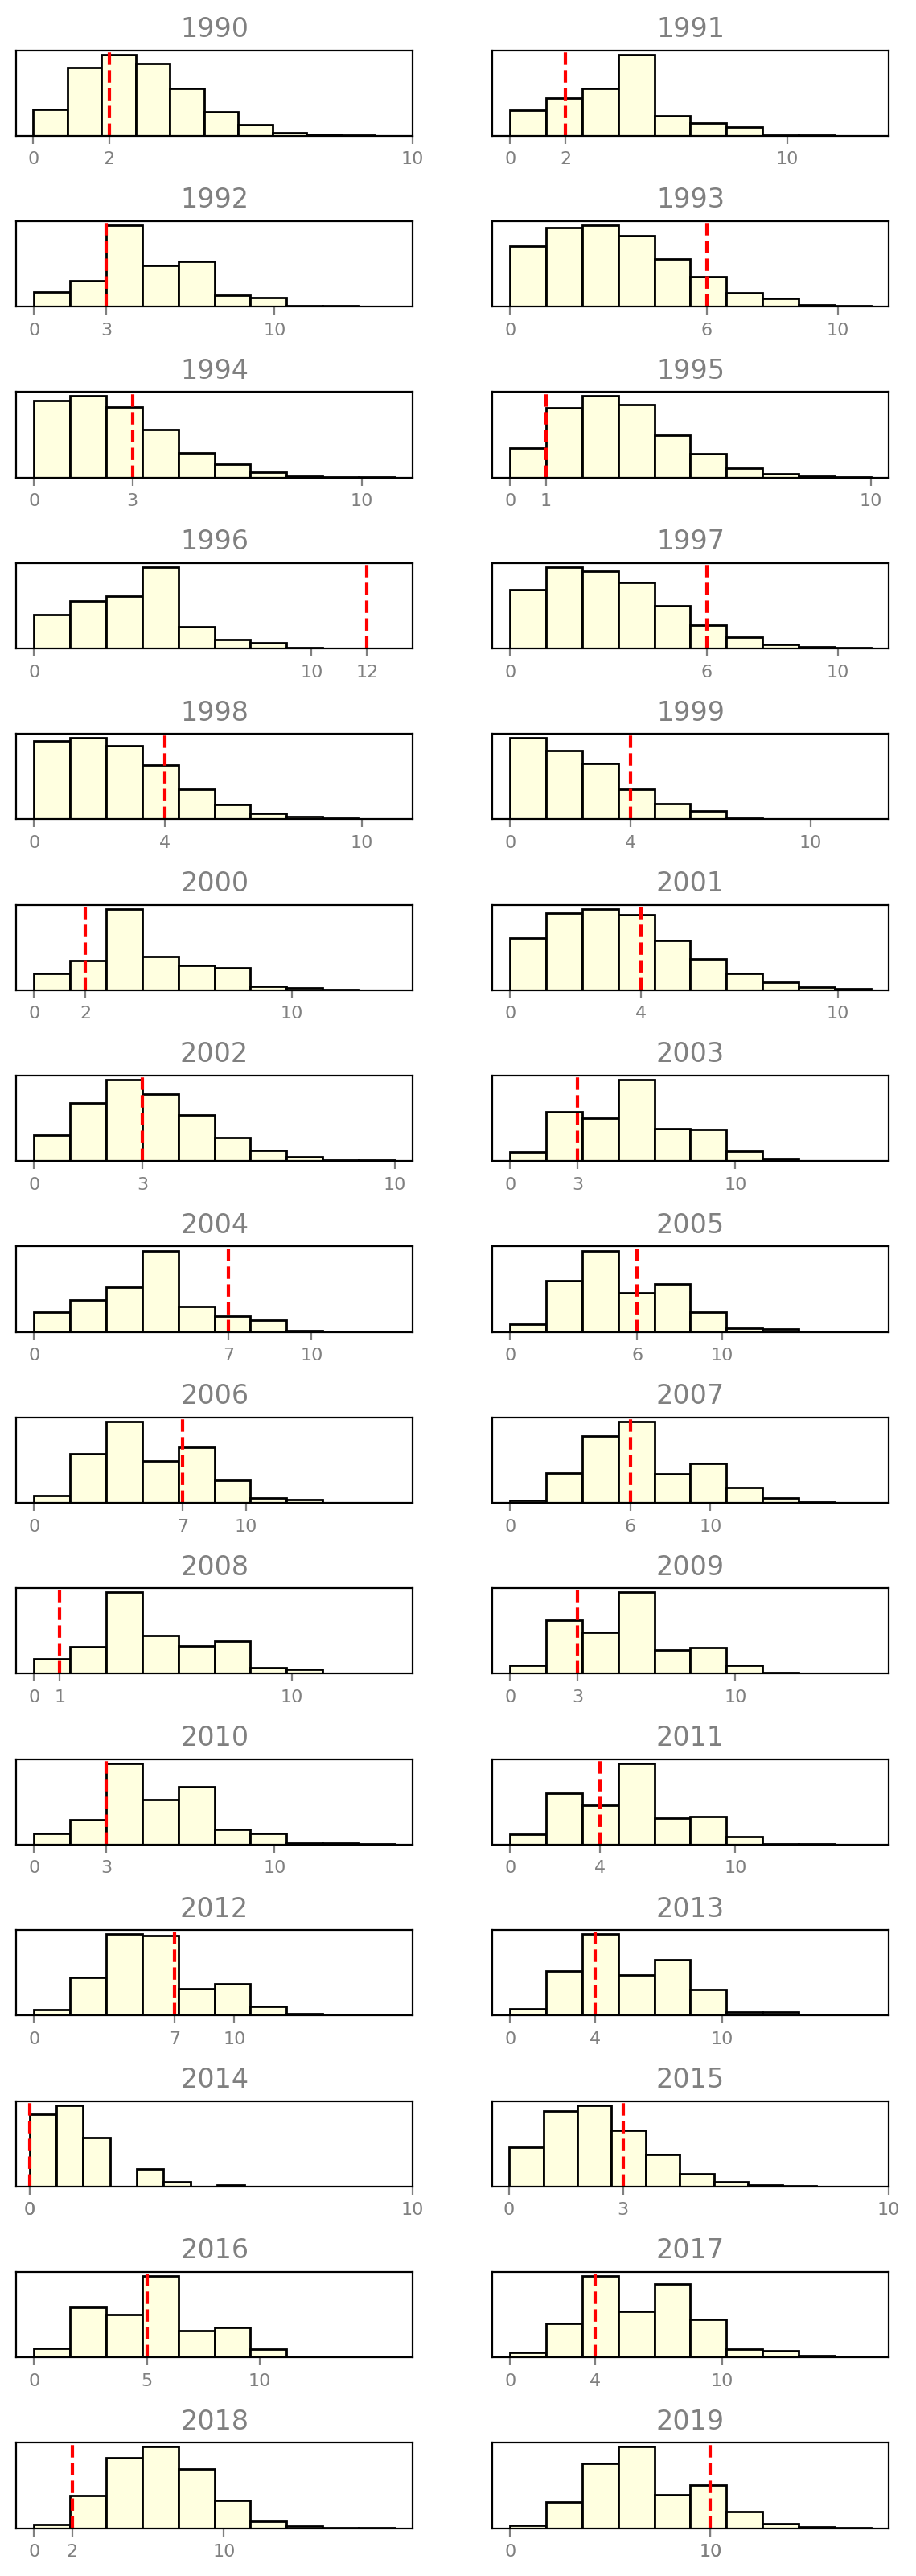

In [73]:
# Tworzenie subplotów
fig, axes = plt.subplots(15, 2, figsize=(7, 20))
axes_flat = axes.flatten()

# Loop through the datasets
for k in range(len(axes_flat)):
    ax = axes_flat[k]
    ax.hist(y_posterior[:, k], bins=10, color='lightyellow', edgecolor='black', density='True')
    ax.set_title(deaths_years[k], color = 'grey')
    ax.tick_params(axis='both', colors='grey')
    ax.axvline(x=deaths_climbers[k], color='red', linestyle='--')
    ax.set_xticks([0, deaths_climbers[k], 10])
    ax.set_yticks([])

# Dostosowanie odstępów
plt.subplots_adjust(wspace=0.2, hspace=1)

# Wyświetlenie wykresów
plt.show()

Data is consisent with the prior. Years with fewer climbers climbing tend to have a thinner distribution, with much of the probability density at low values, and for such cases, the number of accidents is low. Generated distribution for a given year is not consistent with actual data. The reason for such behavior may be additional conditions that have not been specified in the model. An example is 2014, where it can be seen that despite the prediction of which the 89% probability density interval does not include the actual value of the number of deaths. This is due to an avalanche whose occurrence is not modeled due to insufficient data.

# 8. Model comparision

Leave-one-out cross-validation (LOO) and the widely applicable information criterion (WAIC) are methods used to estimate the out-of-sample prediction accuracy of a Bayesian model. They do this by evaluating the log-likelihood of the model at the posterior simulations of the parameter values.

Both LOO and WAIC assess the quality of a statistical model based on two criteria:

1. Model fit to the data: LOO and WAIC examine how well the model fits the available data by evaluating the log-likelihood based on the posterior simulations of the parameter values.

2. Model complexity: LOO and WAIC also take into account the complexity of the model, including the number of parameters and the intricacy of the model structure, to assess how well the model generalizes to new data.

By considering both the fit to the data and the complexity of the model, LOO and WAIC provide information about the quality of the model in terms of predicting new data.

In [74]:
model_1_id = az.from_cmdstanpy(posterior = sim_normal_1, log_likelihood = 'log_lik', 
                                 posterior_predictive = 'y_sim', 
                                  observed_data ={'y':df['CLIMBERS DEATHS']} )


model_2_id= az.from_cmdstanpy(posterior=df_members_posterior, log_likelihood = 'log_lik', 
                                  posterior_predictive = 'y_sim', 
                                  observed_data ={'y':df['CLIMBERS DEATHS']})

compare_dict = {'FIRST MODEL': model_1_id,'SECOND MODEL ': model_2_id}

### LOO comparision

               rank   elpd_loo     p_loo  elpd_diff    weight        se  \
SECOND MODEL      0 -68.349784  1.420567   0.000000  0.601005  7.072115   
FIRST MODEL       1 -71.297662  1.666825   2.947878  0.398995  6.432327   

                    dse  warning scale  
SECOND MODEL   0.000000    False   log  
FIRST MODEL    4.869993    False   log  


Text(0.5, 1.0, 'LOO comparison')

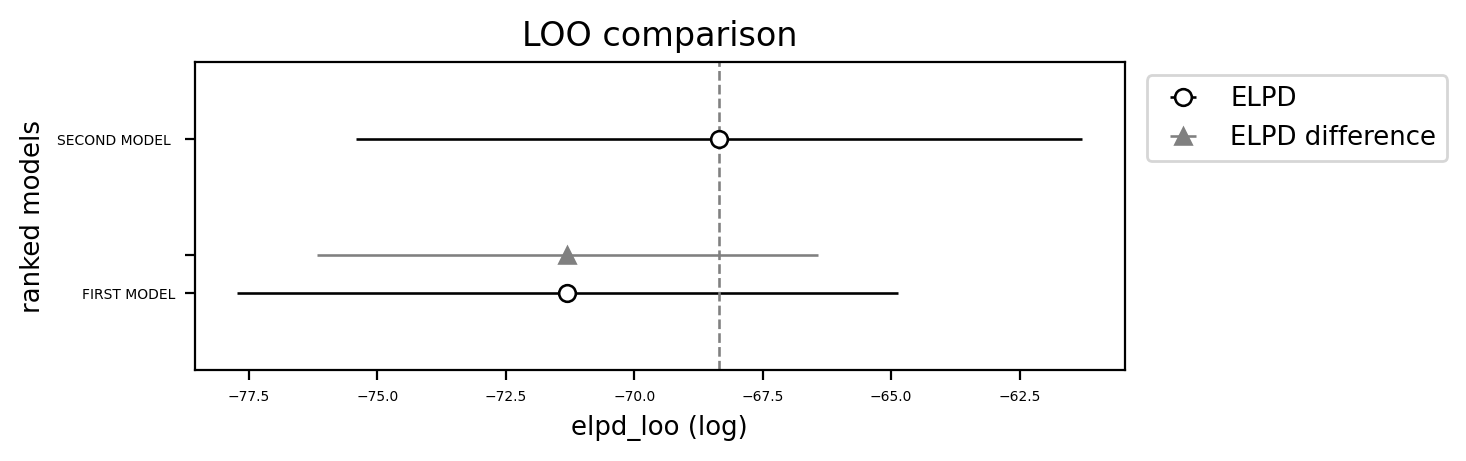

In [75]:
model_compare_loo = az.compare(compare_dict, ic="loo", method="stacking", scale="log")

print(model_compare_loo.head())
az.plot_compare(model_compare_loo)
plt.title('LOO comparison')

Based on the LOO criteria - taking into consideration:
- by the rank - second model is better (lower score)
- by the probability of correctness - second model is better ( higher weight equal to 0,601005)
- by the out-of-sample predictive fit - first model is better ( higher p_loo value)
- by the standard error of the difference information criteria - small difference between models ( se and dse value)

### WAIC comparision

               rank  elpd_waic    p_waic  elpd_diff    weight        se  \
SECOND MODEL      0 -68.343520  1.414303   0.000000  0.600828  7.069075   
FIRST MODEL       1 -71.286951  1.656114   2.943431  0.399172  6.426590   

                    dse  warning scale  
SECOND MODEL   0.000000     True   log  
FIRST MODEL    4.869761     True   log  


C:\Users\rafal\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\rafal\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


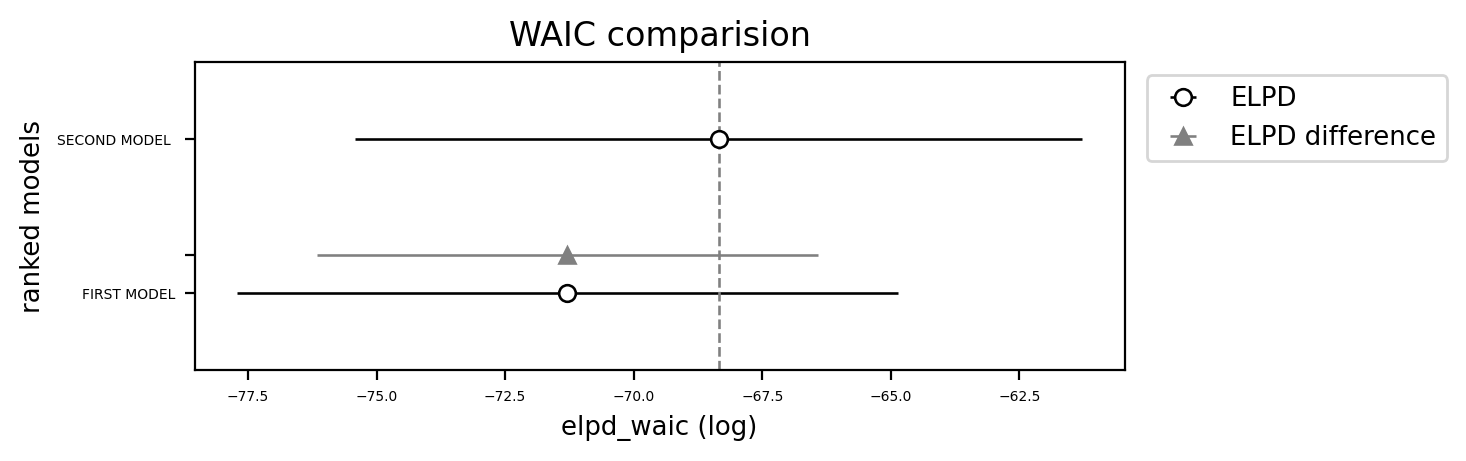

In [76]:
#waic comparision
model_compare_waic = az.compare(compare_dict=compare_dict, ic='waic')
az.plot_compare(model_compare_waic)
plt.title('WAIC comparision')
print(model_compare_waic.head())

Results from WAIC comparisions are very similiar, values are almost identical.

# Conclusions

Visually on the basis of histograms it is hard to assess which model is better. On the other hand, basing on the WAIC and LOO comaprision we can conclude that the second model is better. We agree with this outcome, because second model uses more data. 

Predicting fatal accidents on Mount Everest is not an easy task for several reasons. Firstly, the mountain the highest peaks in the world, and extreme weather conditions such as strong winds, low temperatures, and sudden weather changes pose significant risks to climbers. Secondly, each Everest expedition is a unique challenge, and factors such as physical fitness, climbing experience, supplies, and medical conditions can all impact the safety of participants. Additionally, difficulties in accessing the mountain and the limited window of favorable weather for summit attempts make planning and predicting accidents more complex. All of these factors make predicting accidents on Mount Everest a challenging task that requires considering multiple variables and is difficult to accurately estimate.